In [2]:
#setup
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  

ModuleNotFoundError: No module named 'numpy'

## Get data

In [2]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Knowing the data

In [3]:
print(type(iris))
print("\n")

print("features")
print(iris.feature_names)

print("\ntarget")
print(iris.target)
print("\n")
print(iris.target_names)

<class 'sklearn.utils.Bunch'>


features
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


['setosa' 'versicolor' 'virginica']


In [4]:
print(iris.data.shape)

(150, 4)


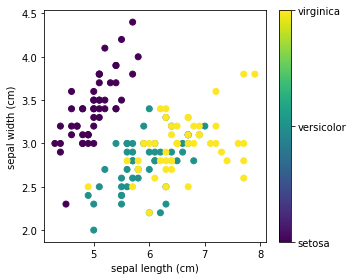

In [5]:
x_index = 0
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

## Model

### Preprocessing

In [6]:
X = iris.data
y = iris.target

#split dataset in 80% - 20%
from sklearn.cross_validation import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 4)  

print(X_train.data.shape)
print(X_test.data.shape)

(120, 4)
(30, 4)


### Modelling

#### Choosing K

In [7]:
accuracy = []

# Calculating accuracy for K values between 1 and 30
for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    #sanity check
    if (i == 10):
        print(pred_i)
        print(y_test)
    accuracy.append(metrics.accuracy_score(y_test,pred_i));

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]
[2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]


Text(0,0.5,'Accuracy')

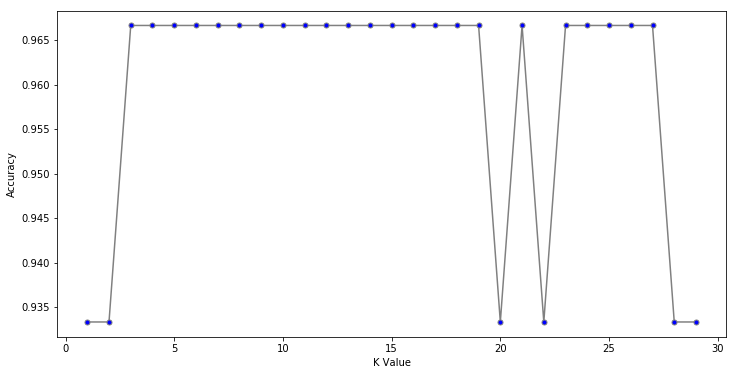

In [8]:
##plotting the accuracy for the predicted values of test set for all the K values between 1 and 30.
   
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), accuracy, color='grey', linestyle='solid', marker='.',  
         markerfacecolor='blue', markersize=10)
plt.xlabel('K Value')  
plt.ylabel('Accuracy')  


#### Evaluating

Between 3 and 17 model shows an accuracy of 96.6%. Let's use **K = 8** as optimal value and retrain

In [9]:
classifier = KNeighborsClassifier(n_neighbors=8)  
classifier.fit(X, y)  
y_pred = classifier.predict(X)  

In [10]:
print(confusion_matrix(y, y_pred))  
print("\n")
print(classification_report(y, y_pred)) 

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



#### Predicting

In [11]:
classes = {0:"setosa", 1:'versicolor', 2:'virginica'}
x_new = [[3,4,5,2],[5, 4, 2, 2]]
y_my_predict = classifier.predict(x_new)
print(classes[y_my_predict[0]])
print(classes[y_my_predict[1]])

versicolor
setosa
